<a href="https://colab.research.google.com/github/tejasmhadgut/Data-Science-Project-Repository/blob/main/DS_Project_Tejas_Mhadgut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from scipy.stats import f_oneway
import warnings

In [67]:
# Ignore all warnings
warnings.filterwarnings('ignore')

In [68]:
# Importing California Housing Dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)


In [69]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [70]:
# Converting the Dataset into Classification Problem from regression problem
df['MedHouseValue'] = pd.DataFrame(data.target)
df["MedHousePrice"] = pd.cut(df["MedHouseValue"],
                               bins = [0.0, 1.5, 3.0, 4.5, np.inf], labels = [1, 2, 3, 4])
df = df.drop(["MedHouseValue"], axis=1)

In [71]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,1
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,1
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,1
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,1


In [72]:
# Spliting the dataset into training and testing data with stratified split to maintain the class proportions
stratified_split = StratifiedShuffleSplit(n_splits=1, train_size=0.8, random_state=42)
X_df = df.drop(["MedHousePrice"], axis=1)
y_df = df["MedHousePrice"]
for train_index, test_index in stratified_split.split(X_df, y_df):
    X_train, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train, y_test = y_df.iloc[train_index], y_df.iloc[test_index]

In [73]:
print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")

X train shape: (16512, 8)
X test shape: (4128, 8)


In [74]:
# Displaying distribution of Target variables from Subset and whole data
subset_data = X_df.iloc[train_index]
subset_data['MedHousePrice'] = y_df.iloc[train_index]

print("\nDistribution of Target Variable in Subset:")
print(subset_data['MedHousePrice'].value_counts(normalize=True))

print("\nDistribution of Target Variable in Whole:")
print(df['MedHousePrice'].value_counts(normalize=True))


Distribution of Target Variable in Subset:
2    0.444949
1    0.369186
3    0.124939
4    0.060925
Name: MedHousePrice, dtype: float64

Distribution of Target Variable in Whole:
2    0.444961
1    0.369186
3    0.124952
4    0.060901
Name: MedHousePrice, dtype: float64


In [75]:
#Droping duplicate values
print(X_train.shape)
X_train = X_train.drop_duplicates(keep='first')
print(X_train.shape)

(16512, 8)
(16512, 8)


In [76]:
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.864952,28.684956,5.433018,1.098612,1424.395470,3.075795,35.636256,-119.571269
std,1.899167,12.588427,2.604361,0.506412,1105.164318,10.933967,2.138775,2.004163
min,0.499900,1.000000,0.846154,0.333333,8.000000,0.692308,32.540000,-124.350000
25%,2.560225,18.000000,4.438596,1.005913,789.750000,2.428571,33.930000,-121.800000
50%,3.526900,29.000000,5.221394,1.048573,1170.000000,2.819961,34.260000,-118.500000
75%,4.742300,37.000000,6.052554,1.098989,1728.000000,3.286276,37.720000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,28566.000000,1243.333333,41.950000,-114.310000


In [77]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
X_train[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,16512.000000,16512.000000,16512.000000,16512.000000
mean,5.433018,1.098612,3.075795,1424.395470
std,2.604361,0.506412,10.933967,1105.164318
min,0.846154,0.333333,0.692308,8.000000
25%,4.438596,1.005913,2.428571,789.750000
50%,5.221394,1.048573,2.819961,1170.000000
75%,6.052554,1.098989,3.286276,1728.000000
max,141.909091,34.066667,1243.333333,28566.000000


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

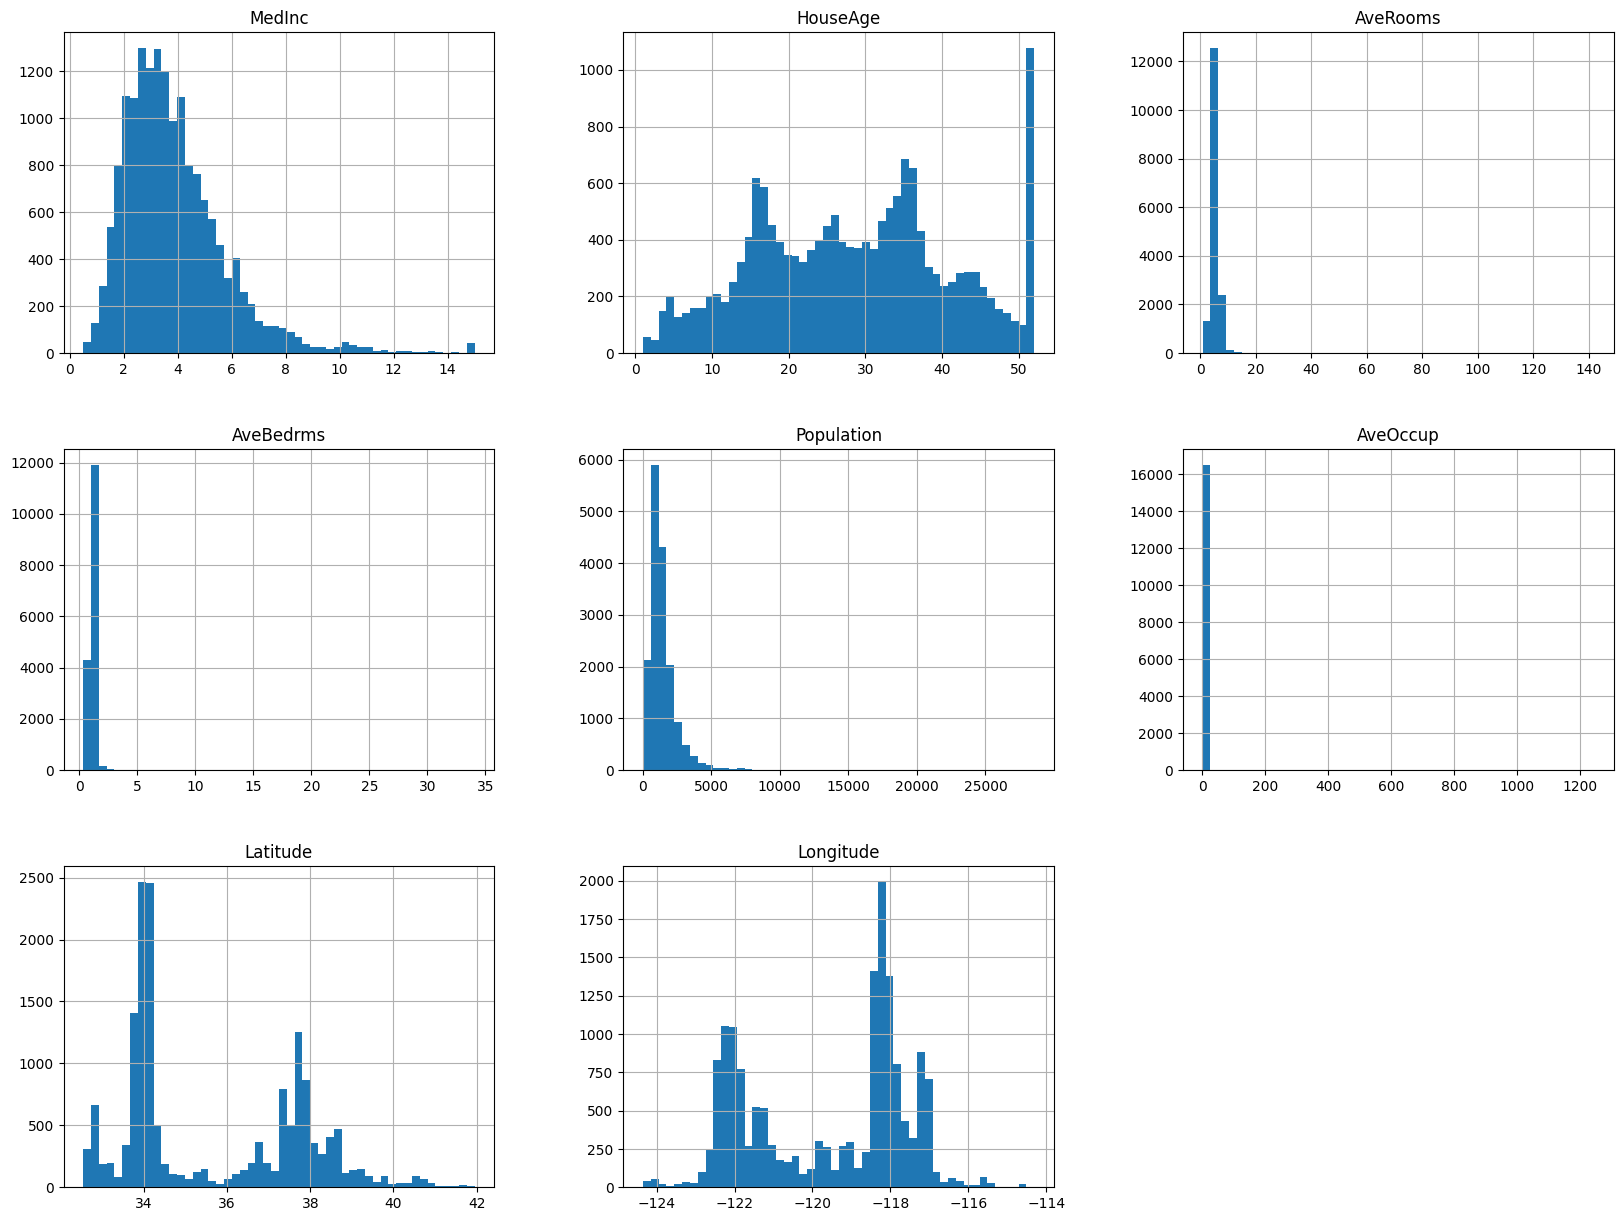

In [78]:
# Displaying histogram for training data
%matplotlib inline
X_train.hist(bins=50, figsize=(20, 15))

<Axes: >

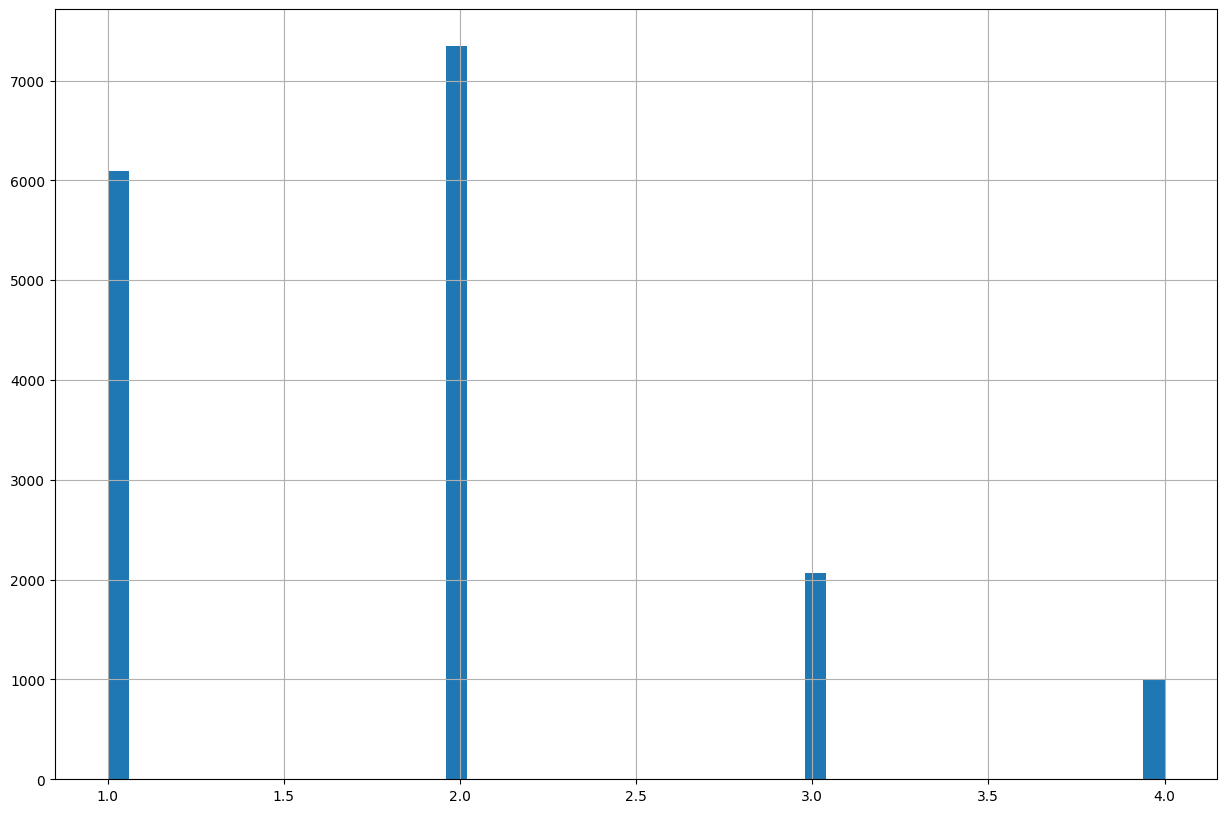

In [79]:
# Displaying class distribution of Target
%matplotlib inline
y_train.hist(bins=50, figsize=(15, 10))

<Axes: xlabel='Longitude', ylabel='Latitude'>

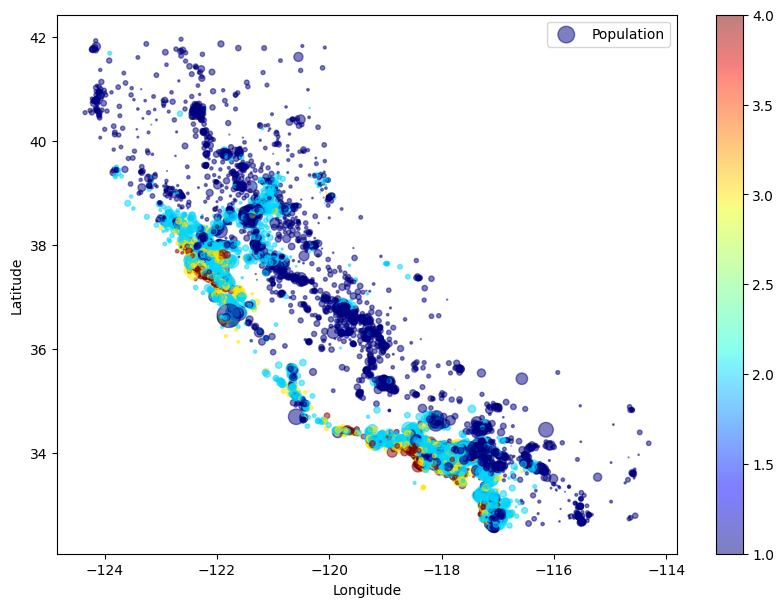

In [80]:
# Displaying scatterplot with respect to Median Housing Price
X_train.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.5,
    s=X_train["Population"]/100, label="Population", figsize=(10,7),
    c=y_train, cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

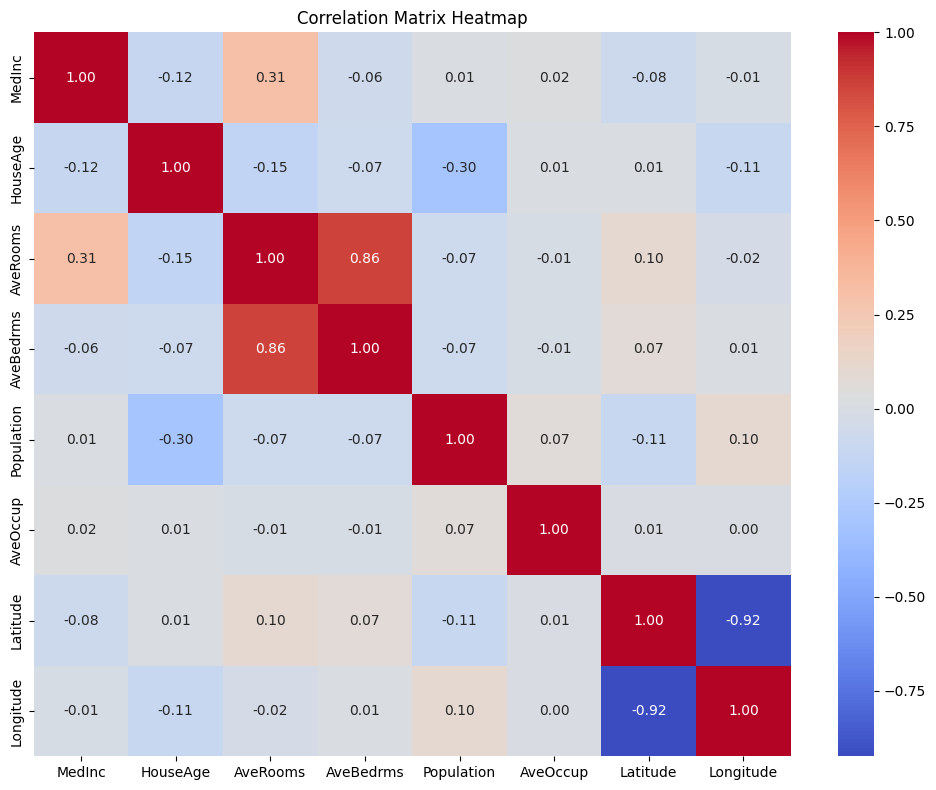

In [81]:
correlation_data_all = pd.concat([X_train, y_train], axis=1)

# Compute the correlation matrix
correlation_matrix_all = correlation_data_all.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

# Set title and display the plot
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [82]:
#As you can see above Correlation metrics does not show correlation with MedHousePrice. It is because MedHousePrice is categorical variable which is not supported.
#Inorder to get the correlation of MedHousePrice with Continous values of other features we will use Correlation ratios.
#Below is Correlation ratios between Categorical Target variable MedHousePrice with other features.
#The correlation ratio measures the ratio of variance explained in the continuous variable by a categorical variable.
#It ranges between 0 and 1, indicating the strength of association.
#A higher correlation ratio implies a stronger relationship between the categorical and continuous variables.

def correlation_ratio(categories, measurements):
    f_ratio, _ = f_oneway(*[measurements[categories == category] for category in np.unique(categories)])
    correlation_ratio = np.sqrt(f_ratio / (f_ratio + 1))
    return correlation_ratio

#target = 'MedHousePrice'
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

for continuous_feature in continuous_features:
    correlation = correlation_ratio(df['MedHousePrice'].values, df[continuous_feature].values)
    print(f"Correlation ratio between {'MedHousePrice'} and {continuous_feature}: {correlation}")

Correlation ratio between MedHousePrice and MedInc: 0.9999048619743856
Correlation ratio between MedHousePrice and HouseAge: 0.9950616020879186
Correlation ratio between MedHousePrice and AveRooms: 0.9970333031770419
Correlation ratio between MedHousePrice and AveBedrms: 0.9802036544263516
Correlation ratio between MedHousePrice and Population: 0.9917444859284377
Correlation ratio between MedHousePrice and AveOccup: 0.8837291598503861
Correlation ratio between MedHousePrice and Latitude: 0.9983772101993797
Correlation ratio between MedHousePrice and Longitude: 0.987732929851443


In [83]:

# Scaling the training data and transforming test data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [84]:
# Removing 70% Labels to explore semi supervised learning
rng = np.random.RandomState(42)
random_unlabeled_points = rng.rand(y_train.shape[0]) < 0.7
y_labeled = np.copy(y_train)
y_labeled[random_unlabeled_points] = -1

In [85]:
y_labeled

array([-1,  1,  2, ..., -1,  3, -1])

In [86]:
# Parameters for hyperparameter tuning
# Logistic Regression without PCA with l1 Regularization
param_grid = {'C': [0.1, 1, 10, 100],
              'max_iter': [3000, 4000, 5000]}

# Initialising Logistic Regression

logistic = LogisticRegression(penalty='l1',solver='liblinear')

grid_search = GridSearchCV(logistic, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_labeled)

best_logistic = grid_search.best_estimator_

# Initialize SelfTrainingClassifier with LogisticRegression
# SelfTrainingClassifier is used for self Learning. It converts supervised learning models to semi supervised model
self_training_clf = SelfTrainingClassifier(best_logistic)

self_training_clf.fit(X_train_scaled, y_labeled)

predicted_labels_without_pca = self_training_clf.predict(X_test_scaled)
labeled_indices = y_labeled != -1

# Accuracy Measures
accuracy = accuracy_score(y_test, predicted_labels_without_pca)
print(f"Accuracy on labeled data: {accuracy:.4f}")

precision = precision_score(y_test, predicted_labels_without_pca, average='weighted')  # You can change the averaging strategy
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, predicted_labels_without_pca, average='weighted')  # You can change the averaging strategy
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, predicted_labels_without_pca, average='weighted')  # You can change the averaging strategy
print(f"F1-score: {f1:.4f}")

Accuracy on labeled data: 0.6652
Precision: 0.6156
Recall: 0.6652
F1-score: 0.6125


In [87]:
print("Confusion Matrix for Logistic Regression without PCA with l1 Regularization")
conf_mat_without_pca = confusion_matrix(y_test, predicted_labels_without_pca)
conf_mat_without_pca


Confusion Matrix for Logistic Regression without PCA with l1 Regularization


array([[1081,  442,    0,    1],
       [ 210, 1623,    0,    4],
       [  12,  499,    0,    5],
       [   2,  207,    0,   42]])

In [88]:
# Parameters for hyperparameter tuning
# Logistic Regression without PCA with l2 Regularization
param_grid = {'C': [0.1, 1, 10, 100],
              'max_iter': [3000, 4000, 5000]}

logistic = LogisticRegression(penalty='l2')

grid_search = GridSearchCV(logistic, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_labeled)

best_logistic = grid_search.best_estimator_

# Initialize SelfTrainingClassifier with Logistic Regression as the base estimator
self_training_clf = SelfTrainingClassifier(best_logistic)

self_training_clf.fit(X_train_scaled, y_labeled)

predicted_labels_without_pca = self_training_clf.predict(X_test_scaled)
labeled_indices = y_labeled != -1
accuracy = accuracy_score(y_test, predicted_labels_without_pca)
print(f"Accuracy on labeled data: {accuracy:.4f}")


precision = precision_score(y_test, predicted_labels_without_pca, average='weighted')  # You can change the averaging strategy
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, predicted_labels_without_pca, average='weighted')  # You can change the averaging strategy
print(f"Recall: {recall:.4f}")

# F1-score
f1 = f1_score(y_test, predicted_labels_without_pca, average='weighted')  # You can change the averaging strategy
print(f"F1-score: {f1:.4f}")

Accuracy on labeled data: 0.6936
Precision: 0.7032
Recall: 0.6936
F1-score: 0.6547


In [89]:
print("Confusion Matrix for Logistic Regression without PCA with l2 Regularization")
conf_mat_without_pca = confusion_matrix(y_test, predicted_labels_without_pca)
conf_mat_without_pca

Confusion Matrix for Logistic Regression without PCA with l2 Regularization


array([[1152,  371,    0,    1],
       [ 250, 1573,    3,   11],
       [  15,  442,   21,   38],
       [   2,  124,    8,  117]])

In [90]:
# Perform PCA on training data
pca = PCA(n_components=0.99)

# Fit PCA on the scaled training data
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [91]:
y_labeled

array([-1,  1,  2, ..., -1,  3, -1])

In [92]:
# Parameters for hyperparameter tuning
# Logistic Regression with PCA with l2 Regularization
param_grid = {'C': [0.1, 1, 10, 100],
              'max_iter': [3000, 4000, 5000]}

logistic = LogisticRegression(penalty='l2')

grid_search = GridSearchCV(logistic, param_grid)
grid_search.fit(X_train_pca, y_labeled)

best_logistic = grid_search.best_estimator_

self_training_clf_pca = SelfTrainingClassifier(best_logistic)

self_training_clf_pca.fit(X_train_pca, y_labeled)

predicted_labels_with_pca = self_training_clf_pca.predict(X_test_pca)
labeled_indices = y_labeled != -1
accuracy = accuracy_score(y_test, predicted_labels_with_pca)
print(f"Accuracy on labeled data: {accuracy:.4f}")


precision = precision_score(y_test, predicted_labels_with_pca, average='weighted')  # You can change the averaging strategy
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, predicted_labels_with_pca, average='weighted')  # You can change the averaging strategy
print(f"Recall: {recall:.4f}")

# F1-score
f1 = f1_score(y_test, predicted_labels_with_pca, average='weighted')  # You can change the averaging strategy
print(f"F1-score: {f1:.4f}")

Accuracy on labeled data: 0.6919
Precision: 0.7028
Recall: 0.6919
F1-score: 0.6526


In [93]:
print("Confusion Matrix for Logistic Regression with PCA with l2 Regularization")
conf_mat_with_pca = confusion_matrix(y_test, predicted_labels_with_pca)
conf_mat_with_pca

Confusion Matrix for Logistic Regression with PCA with l2 Regularization


array([[1149,  374,    0,    1],
       [ 253, 1571,    3,   10],
       [  17,  440,   20,   39],
       [   2,  126,    7,  116]])

In [94]:
# Parameters for hyperparameter tuning
# Logistic Regression with PCA with l1 Regularization
param_grid = {'C': [0.1, 1, 10, 100],
              'max_iter': [3000, 4000, 5000]}

logistic = LogisticRegression(penalty='l1',solver='liblinear')

grid_search = GridSearchCV(logistic, param_grid)
grid_search.fit(X_train_pca, y_labeled)

best_logistic = grid_search.best_estimator_

self_training_clf_pca = SelfTrainingClassifier(best_logistic)

self_training_clf_pca.fit(X_train_pca, y_labeled)

predicted_labels_with_pca = self_training_clf_pca.predict(X_test_pca)
labeled_indices = y_labeled != -1
accuracy = accuracy_score(y_test, predicted_labels_with_pca)
print(f"Accuracy on labeled data: {accuracy:.4f}")

precision = precision_score(y_test, predicted_labels_with_pca, average='macro', zero_division=0)  # You can change the averaging strategy
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, predicted_labels_with_pca, average='macro', zero_division=0)  # You can change the averaging strategy
print(f"Recall: {recall:.4f}")

# F1-score
f1 = f1_score(y_test, predicted_labels_with_pca, average='macro', zero_division=0)  # You can change the averaging strategy
print(f"F1-score: {f1:.4f}")

Accuracy on labeled data: 0.6536
Precision: 0.5519
Recall: 0.4096
F1-score: 0.3890


In [95]:
print("Confusion Matrix for Logistic Regression with PCA with l1 Regularization")
conf_mat_with_pca = confusion_matrix(y_test, predicted_labels_with_pca)
conf_mat_with_pca

Confusion Matrix for Logistic Regression with PCA with l1 Regularization


array([[1088,  436,    0,    0],
       [ 241, 1596,    0,    0],
       [  17,  496,    0,    3],
       [   4,  233,    0,   14]])

In [96]:
# SVC with rbf kernel without pca
svc = SVC(probability=True, gamma="auto",kernel='rbf',C=1.0)

self_training_model = SelfTrainingClassifier(svc)

self_training_model.fit(X_train_scaled, y_labeled)

predicted_labels_without_pca = self_training_model.predict(X_test_scaled)
labeled_indices = y_labeled != -1
accuracy = accuracy_score(y_test, predicted_labels_without_pca)
print(f"Accuracy on labeled data: {accuracy:.4f}")

precision = precision_score(y_test, predicted_labels_without_pca, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, predicted_labels_without_pca, average='weighted')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, predicted_labels_without_pca, average='weighted')
print(f"F1-score: {f1:.4f}")

Accuracy on labeled data: 0.7154
Precision: 0.7152
Recall: 0.7154
F1-score: 0.6958


In [97]:
print("Confusion Matrix for SVC with rbf kernel without pca")
conf_mat_without_pca = confusion_matrix(y_test, predicted_labels_without_pca)
conf_mat_without_pca

Confusion Matrix for SVC with rbf kernel without pca


array([[1185,  337,    1,    1],
       [ 229, 1551,   49,    8],
       [  18,  373,  101,   24],
       [   2,  107,   26,  116]])

In [98]:
# SVC with rbf kernel with pca
svc = SVC(probability=True, gamma="auto",kernel='rbf')

self_training_model_pca = SelfTrainingClassifier(svc)

self_training_model_pca.fit(X_train_pca, y_labeled)

predicted_labels_with_pca = self_training_model_pca.predict(X_test_pca)
labeled_indices = y_labeled != -1
accuracy = accuracy_score(y_test, predicted_labels_with_pca)
print(f"Accuracy on labeled data: {accuracy:.4f}")

precision = precision_score(y_test, predicted_labels_with_pca, average='macro')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, predicted_labels_with_pca, average='macro')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, predicted_labels_with_pca, average='macro')
print(f"F1-score: {f1:.4f}")

Accuracy on labeled data: 0.7086
Precision: 0.7068
Recall: 0.5646
F1-score: 0.5968


In [99]:
print("Confusion Matrix for SVC with rbf kernel with pca")
conf_mat_with_pca = confusion_matrix(y_test, predicted_labels_with_pca)
conf_mat_with_pca

Confusion Matrix for SVC with rbf kernel with pca


array([[1176,  346,    1,    1],
       [ 246, 1537,   47,    7],
       [  20,  377,   95,   24],
       [   2,  111,   21,  117]])

In [100]:
# SVC with linear kernel without pca
svc = SVC(probability=True, gamma="auto",kernel='linear',C=1.0)

self_training_model = SelfTrainingClassifier(svc)

self_training_model.fit(X_train_scaled, y_labeled)

predicted_labels_without_pca = self_training_model.predict(X_test_scaled)
labeled_indices = y_labeled != -1
accuracy = accuracy_score(y_test, predicted_labels_without_pca)
print(f"Accuracy on labeled data: {accuracy:.4f}")

precision = precision_score(y_test, predicted_labels_without_pca, average='macro')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, predicted_labels_without_pca, average='macro')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, predicted_labels_without_pca, average='macro')
print(f"F1-score: {f1:.4f}")

Accuracy on labeled data: 0.6999
Precision: 0.6987
Recall: 0.5403
F1-score: 0.5495


In [101]:
print("Confusion Matrix for SVC with linear kernel without pca")
conf_mat_without_pca = confusion_matrix(y_test, predicted_labels_without_pca)
conf_mat_without_pca

Confusion Matrix for SVC with linear kernel without pca


array([[1144,  379,    0,    1],
       [ 228, 1598,    2,    9],
       [  14,  451,   22,   29],
       [   2,  110,   14,  125]])

In [102]:
# SVC with linear kernel with pca
svc = SVC(probability=True, gamma="auto",kernel='linear')

self_training_model_pca = SelfTrainingClassifier(svc)

self_training_model_pca.fit(X_train_pca, y_labeled)

predicted_labels_with_pca = self_training_model_pca.predict(X_test_pca)
labeled_indices = y_labeled != -1
accuracy = accuracy_score(y_test, predicted_labels_with_pca)
print(f"Accuracy on labeled data: {accuracy:.4f}")

precision = precision_score(y_test, predicted_labels_with_pca, average='macro')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, predicted_labels_with_pca, average='macro')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, predicted_labels_with_pca, average='macro')
print(f"F1-score: {f1:.4f}")

Accuracy on labeled data: 0.7030
Precision: 0.7016
Recall: 0.5485
F1-score: 0.5626


In [103]:
print("Confusion Matrix for SVC with linear kernel with pca")
conf_mat_with_pca = confusion_matrix(y_test, predicted_labels_with_pca)
conf_mat_with_pca

Confusion Matrix for SVC with linear kernel with pca


array([[1150,  373,    0,    1],
       [ 231, 1590,    7,    9],
       [  14,  438,   35,   29],
       [   2,  104,   18,  127]])

In [104]:
# Random Forest with Hyperparametertuning without pca
rf = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15]
}

grid_search_without_pca = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search_without_pca.fit(X_train_scaled, y_labeled)
best_rf_without_pca = grid_search_without_pca.best_estimator_


self_training_model = SelfTrainingClassifier(best_rf_without_pca)

# Fit the SelfTrainingClassifier on the data
self_training_model.fit(X_train_scaled, y_labeled)

predicted_labels_without_pca = self_training_model.predict(X_test_scaled)
labeled_indices = y_labeled != -1
accuracy = accuracy_score(y_test, predicted_labels_without_pca)
print("Best Parameters without PCA:", grid_search_without_pca.best_params_)

accuracy = accuracy_score(y_test, predicted_labels_without_pca)
print(f"Accuracy on labeled data: {accuracy:.4f}")

precision = precision_score(y_test, predicted_labels_without_pca, average='macro')  # You can change the averaging strategy
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, predicted_labels_without_pca, average='macro')  # You can change the averaging strategy
print(f"Recall: {recall:.4f}")

# F1-score
f1 = f1_score(y_test, predicted_labels_without_pca, average='macro')  # You can change the averaging strategy
print(f"F1-score: {f1:.4f}")




Best Parameters without PCA: {'max_depth': 5, 'n_estimators': 50}
Accuracy on labeled data: 0.6945
Precision: 0.6996
Recall: 0.5093
F1-score: 0.5381


In [105]:
print("Confusion Matrix for Random Forest with Hyperparametertuning without pca")
conf_mat_without_pca = confusion_matrix(y_test, predicted_labels_without_pca)
conf_mat_without_pca

Confusion Matrix for Random Forest with Hyperparametertuning without pca


array([[1236,  287,    1,    0],
       [ 331, 1485,   21,    0],
       [  24,  403,   80,    9],
       [   4,  122,   59,   66]])

In [106]:
# Random Forest with Hyperparametertuning with pca
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)

grid_search_with_pca = GridSearchCV(estimator=rf_pca, param_grid=param_grid, cv=5)
grid_search_with_pca.fit(X_train_pca, y_labeled)
best_rf_with_pca = grid_search_with_pca.best_estimator_



self_training_model_pca = SelfTrainingClassifier(best_rf_with_pca)

self_training_model_pca.fit(X_train_pca, y_labeled)
predicted_labels_with_pca = self_training_model_pca.predict(X_test_pca)
labeled_indices = y_labeled != -1
accuracy = accuracy_score(y_test, predicted_labels_with_pca)
print(f"Accuracy on labeled data: {accuracy:.4f}")


precision = precision_score(y_test, predicted_labels_with_pca, average='macro')  # You can change the averaging strategy
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, predicted_labels_with_pca, average='macro')  # You can change the averaging strategy
print(f"Recall: {recall:.4f}")

# F1-score
f1 = f1_score(y_test, predicted_labels_with_pca, average='macro')  # You can change the averaging strategy
print(f"F1-score: {f1:.4f}")


Accuracy on labeled data: 0.6853
Precision: 0.6867
Recall: 0.5256
F1-score: 0.5489


In [107]:
print("Confusion Matrix for Random Forest with Hyperparametertuning with pca")
conf_mat_with_pca = confusion_matrix(y_test, predicted_labels_with_pca)
conf_mat_with_pca

Confusion Matrix for Random Forest with Hyperparametertuning with pca


array([[1177,  347,    0,    0],
       [ 313, 1494,   23,    7],
       [  19,  416,   55,   26],
       [   4,  128,   16,  103]])

In [108]:
# Descision Tree with Hyperparametertuning without pca
dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid for Decision Tree
param_grid = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}


# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_labeled)
best_dt = grid_search.best_estimator_

# Create SelfTrainingClassifier with the best Decision Tree estimator
self_training_model = SelfTrainingClassifier(best_dt)

# Fit the SelfTrainingClassifier on the data
self_training_model.fit(X_train_scaled, y_labeled)

# Predict labels on the test set
predicted_labels = self_training_model.predict(X_test_scaled)

# Calculate and print evaluation metrics
print("Best Parameters for Decision Tree:", grid_search.best_params_)

accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy on labeled data: {accuracy:.4f}")

precision = precision_score(y_test, predicted_labels, average='macro')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, predicted_labels, average='macro')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, predicted_labels, average='macro')
print(f"F1-score: {f1:.4f}")


Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 8}
Accuracy on labeled data: 0.6548
Precision: 0.6252
Recall: 0.5795
F1-score: 0.5960


In [109]:
print("Confusion Matrix for Decision Tree with Hyperparametertuning without pca")
conf_mat_without_pca = confusion_matrix(y_test, predicted_labels)
conf_mat_without_pca

Confusion Matrix for Decision Tree with Hyperparametertuning without pca


array([[1219,  286,   18,    1],
       [ 502, 1149,  177,    9],
       [  31,  226,  216,   43],
       [   8,   49,   75,  119]])

In [110]:
# Descision Tree with Hyperparametertuning with pca
dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid for Decision Tree
param_grid = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}


# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train_pca, y_labeled)
best_dt = grid_search.best_estimator_

# Create SelfTrainingClassifier with the best Decision Tree estimator
self_training_model = SelfTrainingClassifier(best_dt)

# Fit the SelfTrainingClassifier on the data
self_training_model.fit(X_train_pca, y_labeled)

# Predict labels on the test set
predicted_labels = self_training_model.predict(X_test_pca)

# Calculate and print evaluation metrics
print("Best Parameters for Decision Tree:", grid_search.best_params_)

accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy on labeled data: {accuracy:.4f}")

precision = precision_score(y_test, predicted_labels, average='macro')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, predicted_labels, average='macro')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, predicted_labels, average='macro')
print(f"F1-score: {f1:.4f}")


Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 8}
Accuracy on labeled data: 0.6422
Precision: 0.6367
Recall: 0.4898
F1-score: 0.5116


In [111]:
print("Confusion Matrix for Decision Tree with Hyperparametertuning with pca")
conf_mat_with_pca = confusion_matrix(y_test, predicted_labels)
conf_mat_with_pca

Confusion Matrix for Decision Tree with Hyperparametertuning with pca


array([[1069,  454,    0,    1],
       [ 376, 1437,   15,    9],
       [  51,  390,   50,   25],
       [   7,  115,   34,   95]])